## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [2]:
# importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# add more packages
from typing import Dict
from typing import Set
from typing import List
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score
from collections import defaultdict
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.stem import PorterStemmer

In [3]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train: any = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

mydata_test: any = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


In [4]:
# Print the news groups(target) in the dataset

print(list(mydata_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [28]:
# Check the length of the data

print('The length of the {} is {}' .format('`mydata_train.data`', len(mydata_train.data)))
print('The length of the {} is {}' .format('`mydata_train.filenames`', len(mydata_train.filenames)))
print('The length of the {} is {}' .format('`mydata_test.data`', len(mydata_test.data)))
print('The length of the {} is {}' .format('`mydata_test.filenames`', len(mydata_test.filenames)))

The length of the `mydata_train.data` is 11314
The length of the `mydata_train.filenames` is 11314
The length of the `mydata_test.data` is 7532
The length of the `mydata_test.filenames` is 7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [7]:
text: any = mydata_train.data
test: any = mydata_test.data

## Preprocessing the Corpus

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Andy
[nltk_data]     Cui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Clean corpus
def clean_corpus(line: list[str]) -> list[str]:
    '''
    preprocess and clean a given line.
    
    - line: The text line to be cleaned.
    ---
    - list: A list of preprocessed tokens from the line.
    '''
    
    # Followed as1 method to clean data
    # Remove links
    line: list[str] = re.sub(r'http\S+', '', line)
    
    # Convert the line to lowercase
    line: list[str] = line.lower()
    
    # Remove punctuation from the line
    line: list[str] = ''.join([char for char in line if char not in string.punctuation])
    
    # Tokenize
    tokens: list[str] = nltk.word_tokenize(line)
    
    # Remove stop words
    tokens: list[str] = [token for token in tokens if token not in stop_words]
    
    # Stemming
    tokens: list[str] = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [10]:
# Preprocessing the data

lines: list[list[str]] = []
word_list: list[str] = []

# Predefined list of stop words
stop_words: set = set(stopwords.words('english'))
stemmer: any = PorterStemmer()

# Tokenize the text documents and update the lists word_list and lines
lines = [clean_corpus(line) for line in text]
# print(len(lines))
word_list: list[str] = [token for line in lines for token in line]

# Make sure the word_list contains unique tokens
word_list: list[str] = list(set(word_list))

# Calculate the total documents present in the corpus
total_docs: int = len(lines)

#Create a dictionary to keep track of index of each word
dict_idx: defaultdict[int, int] = defaultdict(int)
for idx, word in enumerate(word_list):
    dict_idx[word] = idx

In [11]:
# Create a frequency dictionary

def frequency_dict(lines: str) -> dict[str, int]: 
    '''
    create a frequency dictionary
    
    - lines: list containing all the tokens
    ---
    - freq_word: returns a dictionary which keeps the count of the number of documents 
        containing the given word.
    '''
    # Initialize the frequency dictionary
    freq_word: dict[str, int] = defaultdict(int)  
    
    for line in lines:
        
        # This set will keep track of words already counted for the current line
        seen_words: set[str] = set() 
         
        for word in line:
            if word not in seen_words:
                freq_word[word] += 1
                seen_words.add(word)

    return freq_word

In [12]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word: dict[str, int] = frequency_dict(lines)

freq_word

defaultdict(int,
            {'wonder': 452,
             'anyon': 1399,
             'could': 1674,
             'enlighten': 28,
             'car': 485,
             'saw': 266,
             'day': 845,
             '2door': 3,
             'sport': 105,
             'look': 1562,
             'late': 207,
             '60': 198,
             'earli': 268,
             '70': 121,
             'call': 1169,
             'bricklin': 3,
             'door': 142,
             'realli': 1074,
             'small': 433,
             'addit': 307,
             'front': 232,
             'bumper': 23,
             'separ': 211,
             'rest': 335,
             'bodi': 285,
             'know': 2460,
             'tellm': 1,
             'model': 320,
             'name': 676,
             'engin': 343,
             'spec': 106,
             'year': 1418,
             'product': 343,
             'made': 808,
             'histori': 298,
             'whatev': 293,
             'info':

# Formular of Term Frequency(TF)

- TF = $\frac{Number \ of \ times \ term \ t \ appears \ in \ a \ document}{Total \ number \ of \ terms \ in \ the \ document}$

In [13]:
# Create a function to calculate the Term Frequency

def term_frequency(document: list[str], word: str) -> float:
    '''
    calculating the term frequency(tf)
    
    - document: list containing the entire corpus
    - word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    
    # Count the total number of tokens in the document
    total_terms: int = len(document)

    # Count the number of times the word appears in the document
    word_count: int = document.count(word)
    
    # Calculate Term Frequency
    tf: float = word_count / total_terms if total_terms > 0 else 0.0

    return tf

# Formular of Inverse Document Frequency(IDF) 

- IDF = log $\frac{Total \ number \ of \ documents}{Number \ of \ documents \ containing \ term \ t}$

In [14]:
print(freq_word[word])

4


In [15]:
# Create a function to calculate the Inverse Document Frequency

def inverse_df(word: str) -> float:
    '''
    calculate the Inverse Document Frequency(IDF)
    
    - word: word whose inverse document frequency is to be calculated
    ---
    - idf: return inverse document frequency value
    '''
    # Count the number of documents containing the word
    docs_containing_word: dict[str, int] = freq_word[word]
    
    # Calculate Inverse Document Frequency
    # Avoid division by zero in case the word is not present in any document.
    idf: float = math.log(total_docs / (1 + docs_containing_word)) if docs_containing_word + 1 <= total_docs else math.log(1)
    
    return idf

# Formulat of TF-IDF

- TF-IDF(t) = TF(t) x IDF(t)
- We calculate each words in sentence

In [16]:
# Create a function to combine the term frequencies (TF) 
#   and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence: list, dict_idx: dict) -> list[float]:
    '''
    combin the TF and IDF to calculate above to get TF-IDF
    
    - sentence: list containing the entire corpus
    - dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    
    # Init the tf-idf
    tf_idf_vec: list[str] = [0.0] * len(dict_idx)
    
    # Calculate each words tfidf in sentence
    for word in sentence:
        if word in dict_idx:
            tf_val = term_frequency(sentence, word)
            idf_val = inverse_df(word)
            tfidf_val = tf_val * idf_val        
            # Use the index from the dictionary to set the value
            tf_idf_vec[dict_idx[word]] = tfidf_val

    return tf_idf_vec

In [17]:
# Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
tfidf_val_list: List[List[float]] = []

for sentence in lines:
    tfidf_val = tfidf(sentence, dict_idx)
    tfidf_val_list.append(tfidf_val)
    # print(tfidf_val)

In [18]:
# check len
lengths: int = [len(vec) for vec in tfidf_val_list]
unique_lengths: set = set(lengths)
print(unique_lengths)

{88104}


# Fixed length trouble from the `tfidf`
- I found we need use len(dict_idx) to init the tf_idf_vec, if not we might get many different length data. 

## Multinomial Naive Bayes (10 Points)

In [19]:
# use our tfidf to train our MNB(Multinomial Naive Bayes)

x_train = np.array(tfidf_val_list)
print('x_train length:', len(x_train))
y_train = mydata_train.target
print('y_train length:', len(y_train))
model = MultinomialNB(alpha = 0.01)
model.fit(x_train, y_train)


x_train length: 11314
y_train length: 11314


MultinomialNB(alpha=0.01)

In [29]:
# Perform testing on the train dataset

pred: any = model.predict(x_train)

In [30]:
# Calculate the F1 Score and the Accuracy

F1_score: float = f1_score(y_train, pred, average='weighted')
Accuracy: float = accuracy_score(y_train, pred)

print(f"F1 Score: {F1_score} \t percentage: {F1_score * 100:.2f}%")
print(f"Accuracy: {Accuracy} \t percentage: {Accuracy * 100:.2f}%")


F1 Score: 0.958746143094483 	 percentage: 95.87%
Accuracy: 0.9566024394555418 	 percentage: 95.66%


# Analysis:
- For my model, the $\alpha$ = 0.01 is a good smoothing value, since we can choose this value from 0 to 1, its use for Lapace smoothing. 

### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [22]:
# install libraries
# pip install wikipedia

In [23]:
# Import package 
import wikipedia
from wikipedia.exceptions import WikipediaException

In [24]:
'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics: list[str] = ["Northeastern Unversity", 
                    "Natural language processing", 
                    "Machine learning", 
                    "Quantum machine learning", 
                    "Artificial intelligence", 
                    "Data science", 
                    "Master in Data Science",
                    "Bank of America", 
                    "Visa Inc.", 
                    "European Central Bank", 
                    "Bank", 
                    "Financial technology",
                    "International Monetary Fund",
                    "Basketball", 
                    "Swimming", 
                    "Tennis", 
                    "Football", 
                    "College Football", 
                    "Association Football"]

# list of articles to be downloaded
articles: list[str] = [topics]

# download and store articles (summaries) in this variable
data: list[str] = []

for article in articles:
    try: 
        summary = wikipedia.summary(article)
        data.append(summary)
    except wikipedia.exceptions.DisambiguationError as e:
        summary = wikipedia.summary(e.options[0])
        data.append(summary)
    except Exception as e:
        print(f"Error retrieving the article {article}: {e}")


In [25]:
# Check the atticals
print('Summary:')
for summary in data:
    print(summary)
    
print('Topics:')
for article in articles:
    print(article)

Summary:
Association football, more commonly known as football or soccer, is a team sport played between two teams of 11 players each, who primarily use their feet to propel a ball around a rectangular field called a pitch. The objective of the game is to score more goals than the opposing team by moving the ball beyond the goal line into a rectangular-framed goal defended by the opposing team. Traditionally, the game has been played over two 45-minute halves, for a total match time of 90 minutes. With an estimated 250 million players active in over 200 countries and territories, it is the world's most popular sport.
The game of association football is played in accordance with the Laws of the Game, a set of rules that has been in effect since 1863 and maintained by the IFAB since 1886. The game is played with a football that is 68–70 cm (27–28 in) in circumference. The two teams compete to get the ball into the other team's goal (between the posts and under the bar), thereby scoring a

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):**

- I think we need to clean that. Since we download the data base on `wikipedia`，so Wikipedia summaries might contain information that's not directly related to the main topic or might contain introductory phrases or extraneous details. So, we need to clean data followed assignment 1, this is thus, different articles might have different writing styles, tenses, or formats. Standardizing the text can help algorithms process it more efficiently. 

In [26]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    return message



### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [27]:
from sklearn.feature_extraction.text import


SyntaxError: invalid syntax (189822386.py, line 1)

In [ ]:
print(X.shape)

### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data


Plot and annotate the points with different markers for different expected groups.

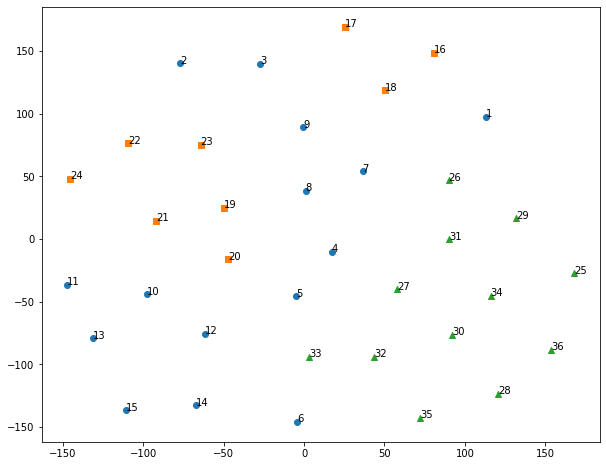

In [ ]:
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))



**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [ ]:
# Import the train.txt and val.txt file into pandas dataframe format

# train

# validation

# and printout the train.shape and validation.shape

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

In [ ]:
# clean the text in the train and validation dataframes using the clean_text function provided above

In [ ]:
# initialise count vectorizer from sklearn module with default parameter

# fit on train dataset and transform both train and validation dataset

In [ ]:
# initialise tfidf vectorizer from sklearn module with default parameter

# fit on train dataset and transform both train and validation dataset

In [ ]:
# initialise label encoder from sklearn module

# fit on train labels and transform both train and validation labels

In [ ]:
# convert the labels into one hot encoding form

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation

  # layer 3 : add the dropout layer with dropout rate of 0.5

  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization

  # layer 5 : add the dropout layer with dropout rate of 0.5

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization

  # layer 7 : add the dropout layer with dropout rate of 0.5

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization

  # layer 9 : add the dropout layer with dropout rate of 0.5

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization

  # layer 11 : add the dropout layer with dropout rate of 0.5

  # layer 12 : output layer with units equal to number of classes and activation as softmax

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy

  return model


In [ ]:
# call the build_model function and initialize the model

In [ ]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

In [ ]:
# again call the build_model function and initialize the model

In [ ]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

What is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**